In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# READING FILES

In [45]:
dfx = pd.read_csv('Diabetes_XTrain.csv') # contains the 8 cases ==> 576*8
dfy = pd.read_csv('Diabetes_YTrain.csv')   # contains labels or if it is diabetic(0) or not(1) ==> 576*1

x = dfx.values   # get values as float or int
y = dfy.values.reshape((-1,)) # get values i.e as int and reshape into 1d array

x_test = pd.read_csv('Diabetes_XTest.csv')
x_test = x_test.values

In [46]:
dfx

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [47]:
print(x)
print(y)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]
[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0

#  KNN ALGO

In [48]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,test,k=5):
    vals = []
    for i in range(x.shape[0]):
        d = distance(test,x[i])
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

In [65]:
pred = knn(x,y,x_test[1])
print(int(pred))

0


In [80]:
predictions = []
for i in range(x_test.shape[0]): 
    pred = knn(x,y,x_test[i])
    predictions.append(int(pred))

print(predictions)    


[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]


#  PLOTTING BAR

<BarContainer object of 2 artists>

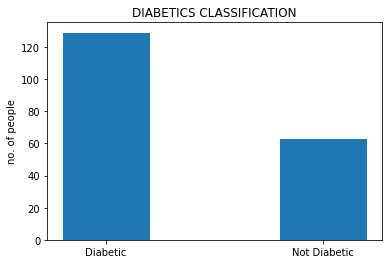

In [96]:
ones = predictions.count(1)
zeroes = predictions.count(0)
xpos=[0,1]
ypos=[zeroes,ones]

state =['Diabetic', 'Not Diabetic']
plt.xticks(xpos,state)
plt.ylabel('no. of people')
plt.title('DIABETICS CLASSIFICATION')
plt.bar(xpos,ypos,width = 0.4)

In [93]:
print(zeroes)

129


## CREATING CSV FILE

In [98]:

col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
new_df = pd.DataFrame(x_test,columns = col)
new_df       

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,180.0,90.0,26.0,90.0,36.5,0.314,35.0
1,2.0,93.0,64.0,32.0,160.0,38.0,0.674,23.0
2,2.0,114.0,68.0,22.0,0.0,28.7,0.092,25.0
3,13.0,76.0,60.0,0.0,0.0,32.8,0.180,41.0
4,1.0,80.0,74.0,11.0,60.0,30.0,0.527,22.0
...,...,...,...,...,...,...,...,...
187,10.0,108.0,66.0,0.0,0.0,32.4,0.272,42.0
188,3.0,130.0,64.0,0.0,0.0,23.1,0.314,22.0
189,0.0,162.0,76.0,36.0,0.0,49.6,0.364,26.0
190,12.0,84.0,72.0,31.0,0.0,29.7,0.297,46.0


In [99]:
new_df['STATE'] = predictions
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,STATE
0,0.0,180.0,90.0,26.0,90.0,36.5,0.314,35.0,1
1,2.0,93.0,64.0,32.0,160.0,38.0,0.674,23.0,0
2,2.0,114.0,68.0,22.0,0.0,28.7,0.092,25.0,0
3,13.0,76.0,60.0,0.0,0.0,32.8,0.180,41.0,0
4,1.0,80.0,74.0,11.0,60.0,30.0,0.527,22.0,0
...,...,...,...,...,...,...,...,...,...
187,10.0,108.0,66.0,0.0,0.0,32.4,0.272,42.0,1
188,3.0,130.0,64.0,0.0,0.0,23.1,0.314,22.0,0
189,0.0,162.0,76.0,36.0,0.0,49.6,0.364,26.0,1
190,12.0,84.0,72.0,31.0,0.0,29.7,0.297,46.0,1
